In [4]:
import pandas as pd

### Pima Indian Diabetes dataset

In [41]:
col_names = ['pregnanat','glucose','bp','skin','insulin','bmi','pedigree','age','target']
data = pd.read_csv('http://mlearn.ics.uci.edu/databases/pima-indians-diabetes/pima-indians-diabetes.data',header=None,names=col_names)

In [42]:
data.head()

,pregnanat,glucose,bp,skin,insulin,bmi,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
col_names.remove('target')
x = data[col_names]
y = data.target

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
import datetime

##### lets try to build all possible models using all the parameters available 

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 11,test_size = 0.4)

In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)
print('train accuracy is %f, test accuracy is %f' %(metrics.accuracy_score(train_pred,y_train),metrics.accuracy_score(test_pred,y_test)))

train accuracy is 0.776087, test accuracy is 0.711039


In [66]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
test_pred = logreg.predict(x_test)
train_pred = logreg.predict(x_train)
print('train accuracy is %f, test accuracy is %f' %(metrics.accuracy_score(train_pred,y_train),metrics.accuracy_score(test_pred,y_test)))

train accuracy is 0.786957, test accuracy is 0.740260


In [69]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
test_pred = RF.predict(x_test)
train_pred = RF.predict(x_train)
print('train accuracy is %f, test accuracy is %f' %(metrics.accuracy_score(train_pred,y_train),metrics.accuracy_score(test_pred,y_test)))

train accuracy is 0.984783, test accuracy is 0.717532


In [72]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
test_pred = DT.predict(x_test)
train_pred = DT.predict(x_train)
print('train accuracy is %f, test accuracy is %f' %(metrics.accuracy_score(train_pred,y_train),metrics.accuracy_score(test_pred,y_test)))

train accuracy is 1.000000, test accuracy is 0.668831


##### From the above results we can see that both the tree based models, DT and RF are overfittinng the model on train data.. based on the results Logistic seems to be the best of all the models.

#### Lets check the results using cross validation scores..

In [81]:
models = [knn,logreg,DT,RF]
for model in models:
    scores = cross_val_score(model,x,y,cv = 10 , n_jobs = -1,scoring='accuracy')
    print('for the model %s the cv score is %f' %(model,scores.mean()))

for the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform') the cv score is 0.743472
for the model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) the cv score is 0.766969
for the model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') the cv score is 0.701760
for the model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_sam

#### Based on CV mean score also Logistic is the best model for the given data set with a cv mean score of 0.767

#### Lets try to tune the parameters using Gridsearch CV for KNN and see if we can improve the accuracy 

In [194]:
k_range = range(1,30)
weights_var = ['uniform','distance']
grid_param = {"n_neighbors" :list(k_range),"weights" : weights_var}
grid = GridSearchCV(knn,grid_param,cv = 10,scoring = 'accuracy',n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [195]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')
{'weights': 'uniform', 'n_neighbors': 18}
0.752173913043


#### Above results show that KNN gives the best result for n_neigbors = 8 and weights = 'uniform'

#### Lets now try tunning the parameters of Random Forest using GridsearchCV first and then RandomsizedCV

In [196]:
RF=RandomForestClassifier()
grid_param_rf = { "n_estimators" : list(range(10,200,10)) ,
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"],
                }
time = datetime.datetime.now()
grid_rf = GridSearchCV(RF,grid_param_rf,cv = 10,n_jobs=-1,scoring = 'accuracy' )
grid_rf.fit(x_train,y_train)
print('time taken by GridsearchCV is %s'%(datetime.datetime.now()-time))

time taken by GridsearchCV is 0:04:27.485218


In [197]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'bootstrap': True, 'max_features': 'log2', 'criterion': 'entropy', 'n_estimators': 170}
0.773913043478


In [198]:
RF=RandomForestClassifier()
grid_param_rf = { "n_estimators" : list(range(10,200,10)) ,
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"],
                }
time = datetime.datetime.now()
rscv_rf = RandomizedSearchCV(RF,grid_param_rf,cv = 10,n_jobs=-1,scoring = 'accuracy' )
rscv_rf.fit(x_train,y_train)
print('time taken by RandomizedSearchCV is %s'%(datetime.datetime.now()-time))

time taken by RandomizedSearchCV is 0:00:16.816590


In [199]:
print(rscv_rf.best_estimator_)
print(rscv_rf.best_params_)
print(rscv_rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'bootstrap': True, 'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 130}
0.765217391304


In [206]:
metrics.accuracy_score(rf.predict(x_train),y_train)

0.7369565217391304

In [203]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
rf.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Now lets try to predict our validation set based on the tune parameters using all the models

In [200]:
print('Logistics accuracy for train data is %f, for test data is %f'%(metrics.accuracy_score(logreg.predict(x_train),y_train),metrics.accuracy_score(logreg.predict(x_test),y_test)))
print('KNN accuracy for train data is %f, for test data is %f'%(metrics.accuracy_score(grid.predict(x_train),y_train),metrics.accuracy_score(grid.predict(x_test),y_test)))
print('Random forest accuracy for train data is %f, for test data is %f'%(metrics.accuracy_score(grid_rf.predict(x_train),y_train),metrics.accuracy_score(grid_rf.predict(x_test),y_test)))
print('Random forest accuracy for train data is %f, for test data is %f'%(metrics.accuracy_score(rscv_rf.predict(x_train),y_train),metrics.accuracy_score(rscv_rf.predict(x_test),y_test)))

Logistics accuracy for train data is 0.786957, for test data is 0.740260
KNN accuracy for train data is 0.771739, for test data is 0.720779
Random forest accuracy for train data is 1.000000, for test data is 0.756494
Random forest accuracy for train data is 1.000000, for test data is 0.746753


#### Now after parameter tunning if we look at the results, we will Logistic as the best model as it produces results closer to RF and is simpler than RF

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


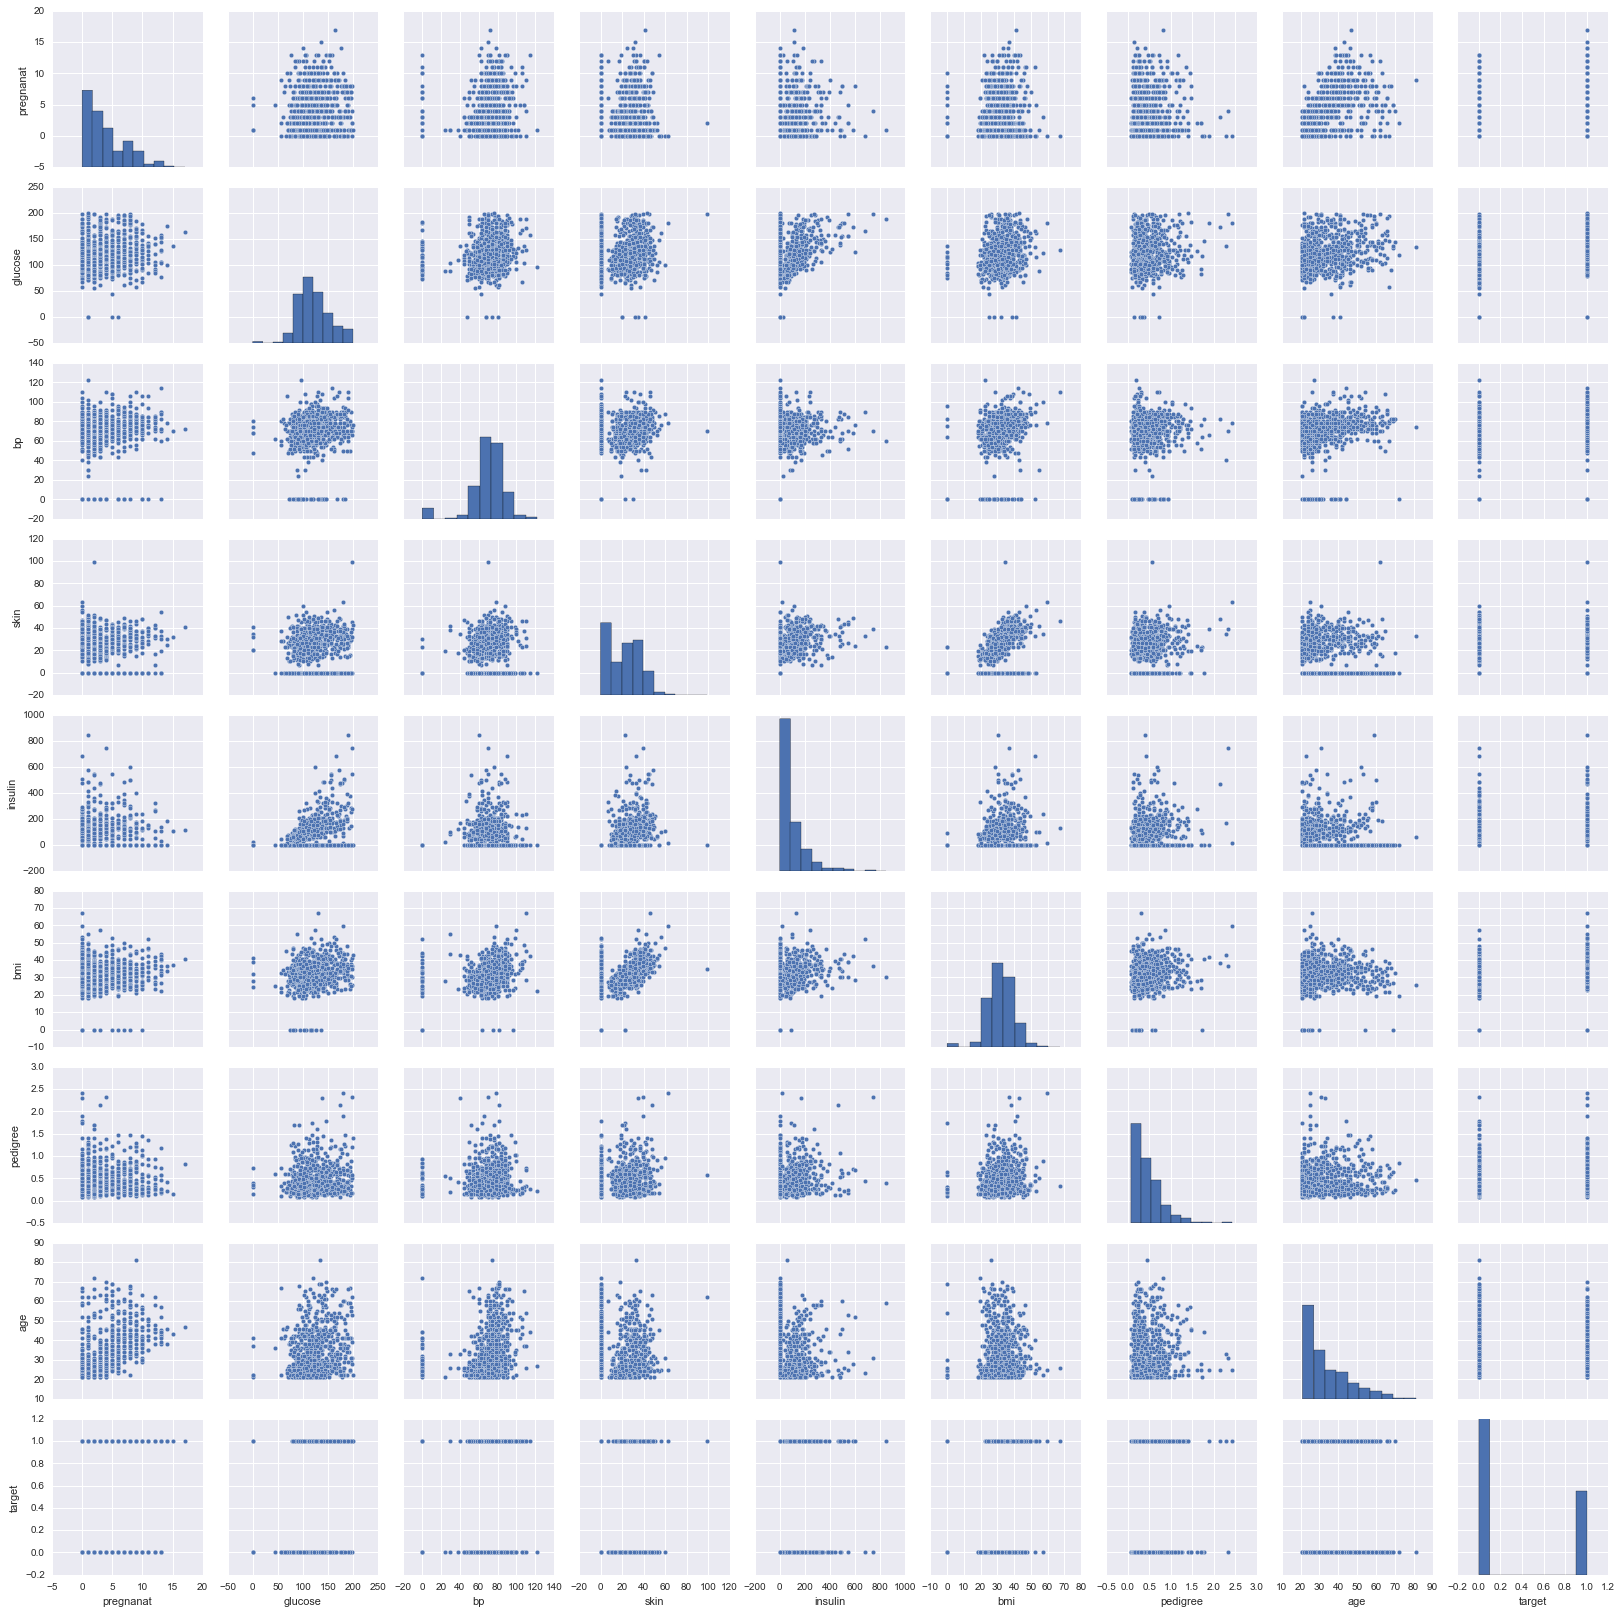

In [210]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data)

## Now lets try to evaluate the Logestic and Knn classification model based on different metrics

#### Why dont we do that by using selected columns in the dataset

In [212]:
## selecting few of the available columns
feature_cols = ['pregnanat','insulin','bmi','age']
x = data[feature_cols]
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 11 , test_size = 0.3)


In [234]:
### Lets now build a Logistic regression model
logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)
print('accuracy using logistic is : %f' %metrics.accuracy_score(y_test,logreg1.predict(x_test)))

accuracy using logistic is : 0.705628


#### Finding the null accuracy

In [221]:
y_test.value_counts()

0    149
1     82
Name: target, dtype: int64

In [225]:
## predicting all the observations to be 0 will give us
print('Null accuracy is %f' %(149/231))

Null accuracy is 0.645022


In [229]:
y_test.value_counts().head(1)/len(y_test)

0    0.645022
Name: target, dtype: float64

#### Null accuracy is not far away fromm our logistic regression model in terms of accuracy... but accuracy is not always a metrics on which we decide on the mode.

In [239]:
### Comparing true and predicted values
pred = logreg1.predict(x_test)

print('True:',y_test.values[1:25])
print('Pred:',pred[1:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


#### Just by looking at the predictions we cannot say how many predicted 0's are correct and how many 1's were predicted correctly, for that purpose we have confusion matric.  

In [242]:
confusion = metrics.confusion_matrix(y_test,pred)

In [244]:
confusion

array([[139,  10],
       [ 58,  24]])

In [246]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [248]:
### Classification Accuracy
print((TP+TN)/(TP+TN+FP+FN))

0.705627705628


#### Sensitivity : When the actual is positive, how often we are predicting it as positive

In [254]:
print(TP/(TP+FN))
print(metrics.recall_score(y_test,pred))

0.292682926829
0.292682926829


#### Specificity : When the actual is negative, how often we are predicting it as negative

In [256]:
print(TN/(TN+FP))

0.93288590604


#### Precision : Out of the total predicted positives, what percentage of those are correclty predictced

In [260]:
print(TP/(TP+FP))
print(metrics.precision_score(y_test,pred))

0.705882352941
0.705882352941
